In [2]:
import numpy as np
from classy import Class
import matplotlib.pyplot as plt

In [3]:
import pickle
def save_pickle(dat, filename, **kwargs):
    file = open(filename,'wb')
    pickle.dump(dat, file)
    file.close()
    
def load_pickle(filename, **kwargs):
    with open(filename, 'rb') as fin:
        return pickle.load(fin,  )
params = {
     "font.family": "serif",
     "font.serif": ["Times", "Times New Roman", "DejaVu Serif"],
     "axes.labelsize": 10,
     "font.size": 10,
     "legend.fontsize": 8,
     "xtick.labelsize": 8,
     "ytick.labelsize": 8,
     "text.usetex": True,
     #"figure.figsize": [3.386, 3.386],
     "figure.dpi": 300,
     "savefig.bbox": "tight",
     "savefig.pad_inches": 0.05,
     "axes.linewidth": 0.8,
     "xtick.major.width": 0.8,
     "ytick.major.width": 0.8,
     "xtick.direction": "in",
     "ytick.direction": "in",
    "xtick.top": True,
     "ytick.right": True,
 }
plt.rcParams.update(params)

In [4]:
#summary = np.load('../euclid_flagship_simulations/flagship_like_summary_stat_DES_MoR_Mwl_scatter_model_Gamma0.7_gaussian_lensing_variable_Mwl.npy', allow_pickle=True).item()

In [5]:
#np.mean(summary['mean_log10m200b'])

In [6]:
#np.sum(summary['count_with_m200b_def'])

In [7]:
data = load_pickle('../../capish_sbi_data/config_sbi_DESlike6_corrected_standard_prior_6_params/simulations.pkl')

In [8]:
count = np.sum(np.sum(data['x'][0], axis=1), axis=1)
mean_mass = np.mean(np.mean(data['x'][1],axis=1), axis=1)

In [9]:
mask_full = []
for i in range(len(data['x'][0])):
    c = data['x'][0][i].flatten()
    mask = c==0
    if np.sum(mask)==0: 
        mask_full.append(True)
    else: 
        mask_full.append(False)
mask_full = np.array(mask_full)

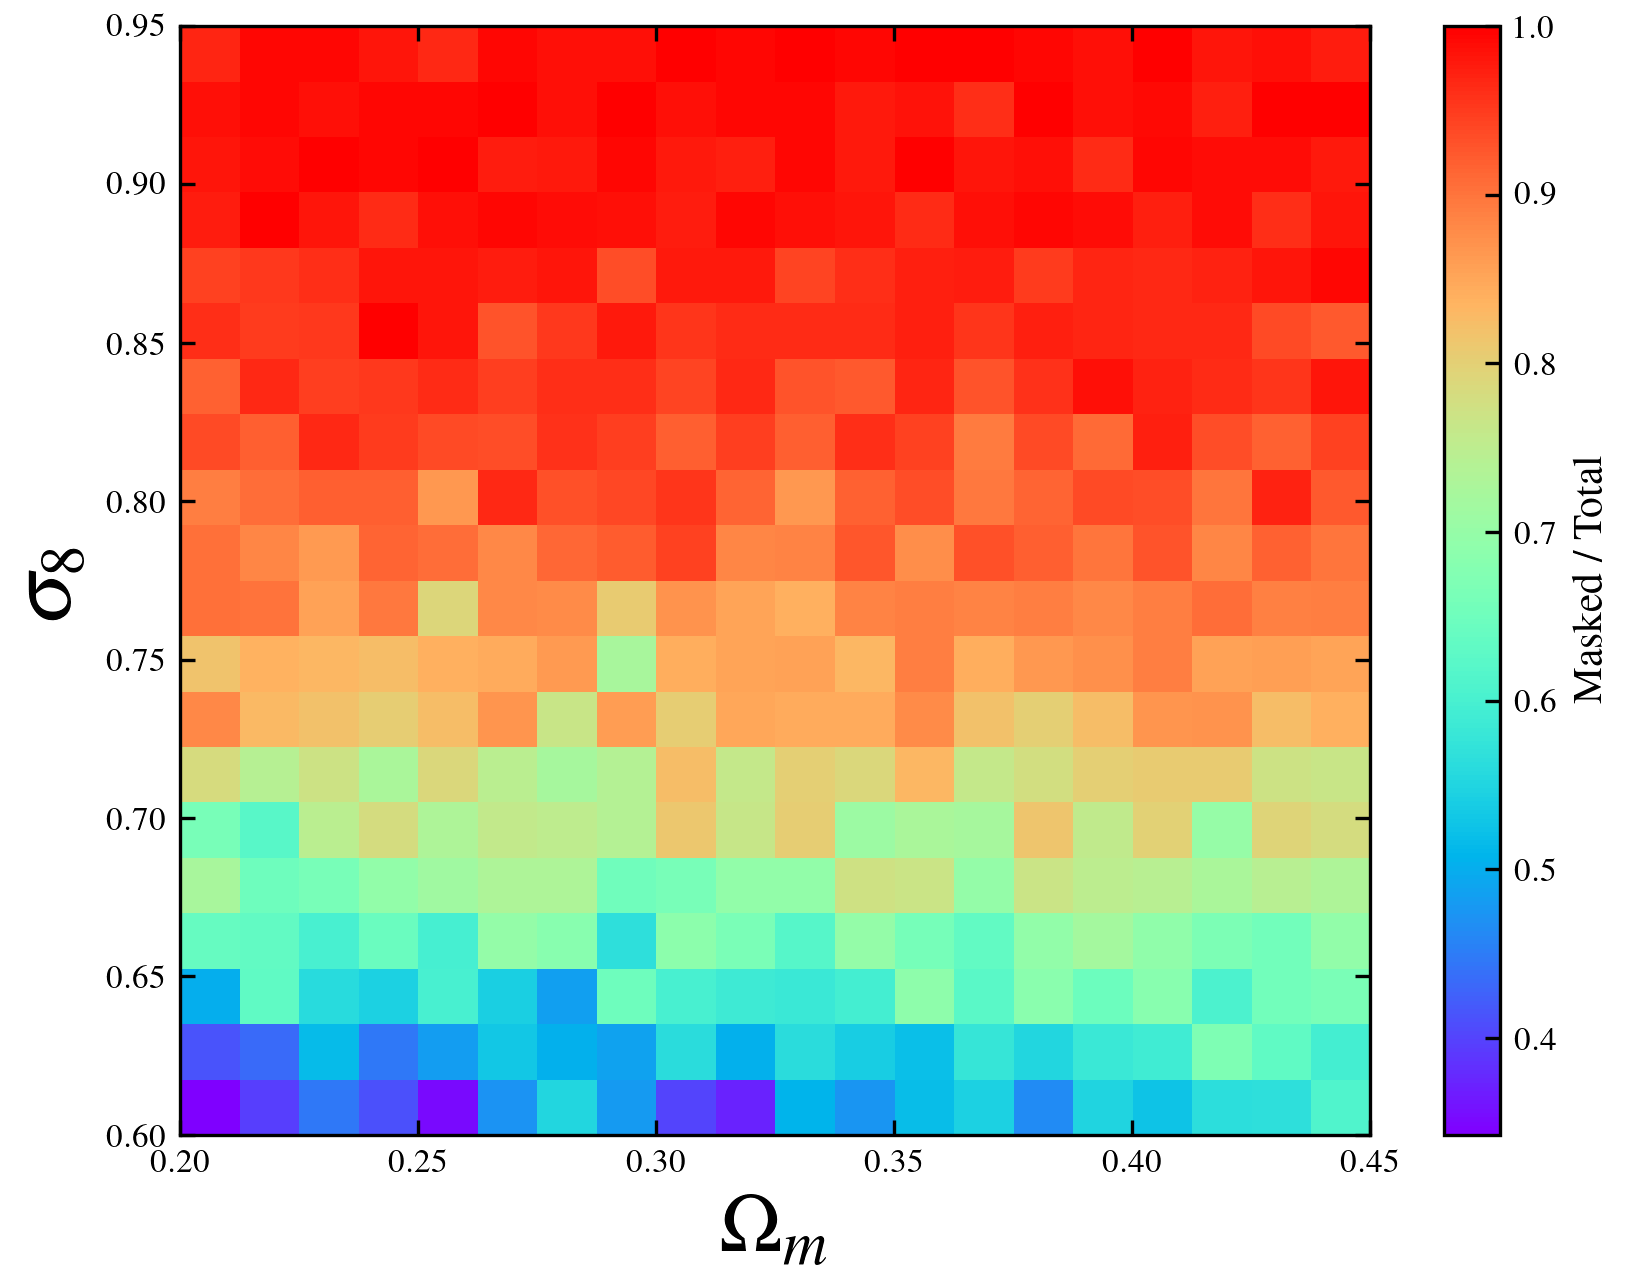

In [10]:
# choose bins
nbins = 20  # adjust as needed

x = data['theta'][:, 0]  # Omega_m
y = data['theta'][:, 1]  # sigma_8

# total count per bin
H_tot, xedges, yedges = np.histogram2d(
    x, y, bins=nbins
)

# failed count per bin
H_fail, _, _ = np.histogram2d(
    x[mask_full], y[mask_full], bins=[xedges, yedges]
)

ratio = np.zeros_like(H_tot, dtype=float)

nonzero = H_tot > 0
ratio[nonzero] = H_fail[nonzero] / H_tot[nonzero]

plt.imshow(
    ratio.T,
    origin='lower',
    cmap='rainbow',
    extent=[0.2, 0.45, 0.6, 0.95],
    aspect='auto'
)
plt.colorbar(label='Masked / Total')
plt.xlabel(r'$\Omega_m$', fontsize=20)
plt.ylabel(r'$\sigma_8$', fontsize=20)

plt.savefig(f'masked_binned_map.png', dpi = 300, bbox_inches='tight',)

In [ ]:
#plt.scatter(data['failed_theta'][:,0], data['failed_theta'][:,1])
count = np.sum(np.sum(data['x'][0], axis=1), axis=1)
plt.scatter(data['theta'][:,0], data['theta'][:,1],s=1)
mask = (count > 0)
#plt.scatter(data['theta'][:,0][mask], data['theta'][:,1][mask],s=3, c=np.log10(count[mask]), cmap='rainbow')
#plt.colorbar(label='total count per simulation')

mask = (count>90000)*(count<100000)
plt.scatter(data['theta'][:,0][mask], data['theta'][:,1][mask],s=1, c='k', label=r'total $N = N_{\rm data} \pm 5000$')

mask = (mean_mass>14.5)*(mean_mass<14.53)
plt.scatter(data['theta'][:,0][mask], data['theta'][:,1][mask],s=1, c='b', label=r'mean log10m = mean log10m$_{\rm data} \pm 0.01$')

plt.scatter([0.319], [0.813], s=500, marker = '*',color = 'r', edgecolors='k')
plt.legend(framealpha=1)
plt.xlabel(r'$\Omega_m$', fontsize=20)
plt.ylabel(r'$\sigma_8$', fontsize=20)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


49993


Text(0, 0.5, '$\\sigma_8$')

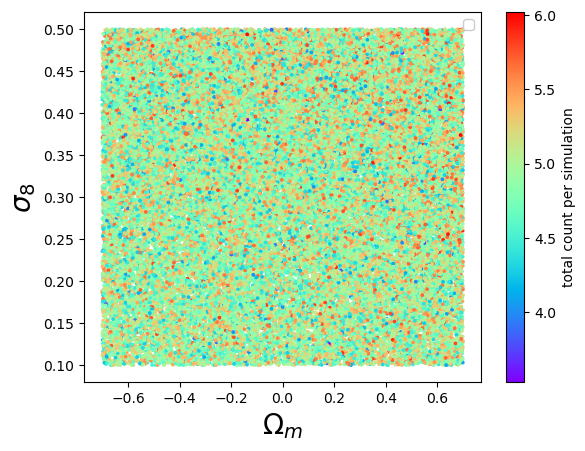

In [56]:
#plt.scatter(data['failed_theta'][:,0], data['failed_theta'][:,1])
count = data['x'][0]

mask = []
for i in range(len(count)):
    x = count[i]
    x = np.sum(x==0)
    if x >= 1: mask.append(False)
    else: mask.append(True)
mask = np.array(mask)
print(np.sum(mask))

N = np.sum(np.sum(count, axis=1), axis=1)

#plt.scatter(data['theta'][:,0], data['theta'][:,1],s=1)
plt.scatter(data['theta'][:,4][mask], data['theta'][:,5][mask],s=3, c=np.log10(N[mask]), cmap='rainbow')

#plt.scatter(data['theta'][:,0][np.invert(mask)], data['theta'][:,1][np.invert(mask)],s=3, c='k')
plt.colorbar(label='total count per simulation')


plt.legend(framealpha=1)
plt.xlabel(r'$\Omega_m$', fontsize=20)
plt.ylabel(r'$\sigma_8$', fontsize=20)

In [29]:
data = load_pickle('../../capish_sbi_data/config_sbi_DES_MoR_log10Mwl_individual_scatter_narrow_prior_1_param/simulations.pkl')
count = data['x'][0]

FileNotFoundError: [Errno 2] No such file or directory: '../../capish_sbi_data/config_sbi_DES_MoR_log10Mwl_individual_scatter_narrow_prior_1_param/simulations.pkl'

In [12]:
log10mass = data['x'][1]

In [13]:
z_bin=4
rich_bin=5

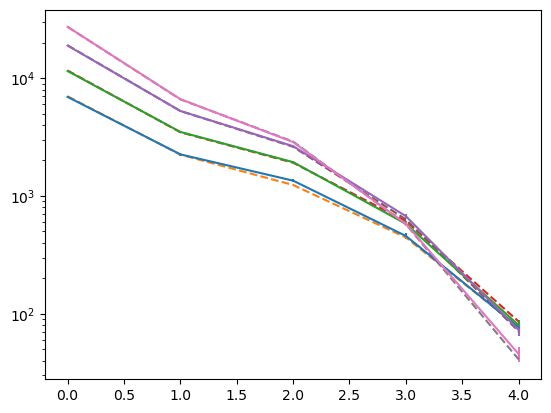

In [14]:
x = np.arange(len(np.mean(count, axis=0)))
for i in range(z_bin):
    plt.errorbar(x, np.mean(count, axis=0)[:,i], np.std(count, axis=0)[:,i])
    plt.plot(x, summary['count_with_m200b_def'][:,i], '--')
plt.yscale('log')

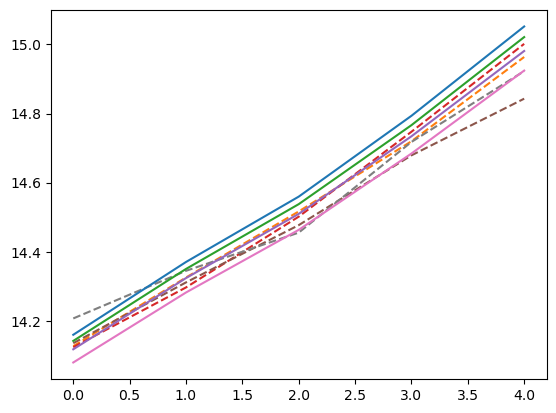

In [19]:
x = np.arange(len(np.mean(count, axis=0)))
for i in range(z_bin):
    plt.errorbar(x, np.mean(log10mass, axis=0)[:,i],)
    plt.plot(x,  summary['mean_log10m200b'][:,i], '--')
